In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy.matlib

In [14]:
# STEP 1: Assign memory for the weights matrix and create an environment with a cell representing each location

rows = 10
cols = 10
nCells = rows *cols
weightsMat = np.zeros(((rows, cols, nCells)))
nIterations = 10
NetThreshold = 0.5
sensorySigma = 1.5

# Create an index sheet for the PC output
PC_idx = np.arange(rows * cols).reshape(rows, cols)
print(PC_idx)

[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]
 [30 31 32 33 34 35 36 37 38 39]
 [40 41 42 43 44 45 46 47 48 49]
 [50 51 52 53 54 55 56 57 58 59]
 [60 61 62 63 64 65 66 67 68 69]
 [70 71 72 73 74 75 76 77 78 79]
 [80 81 82 83 84 85 86 87 88 89]
 [90 91 92 93 94 95 96 97 98 99]]


In [5]:
# function to create a 3D plot of the firing rates of cells

def create3Dplot(rows,cols,Z):
    # Generate the grid
    x = np.arange(0, rows, 1)  # Equivalent to -5:0.1:5 in MATLAB
    y = np.arange(0, cols, 1)
    X, Y = np.meshgrid(x, y)

    # Create the 3D plot
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')

    # Plot the surface
    surf = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')

    # Add labels and title

    ax.set_title('3D Surface Plot')

    # Add a colour bar for the surface
    #fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10)

    # Show the plot
    plt.ion()
    plt.show()
    plt.pause(0.001)
    input("Press Enter to continue...")  # Wait for the user to press Enter
    plt.close(fig)

In [6]:
# Define the Gaussian function for firing fields
def gaussian(X, Y, cx, cy, sigma=sensorySigma):
    """
    Computes a 2D Gaussian function centered at (cx, cy).
    
    Parameters:
    X, Y   : 2D arrays representing the coordinate grid where the Gaussian is evaluated.
    cx, cy : Coordinates of the Gaussian center.
    sigma  : Standard deviation, controlling the spread of the Gaussian (default is 6).
    
    Returns:
    A 2D array with Gaussian values at each (X, Y) position.
    """
    
    # Compute the squared distance from the center (cx, cy) for each grid point
    distance_sq = (X - cx) ** 2 + (Y - cy) ** 2
    
    # Compute the Gaussian function using the standard formula
    gauss = np.exp(-distance_sq / (2 * sigma ** 2))
    
    return gauss / np.max(gauss)

In [7]:
# STEP 2: Initialise the weights in the weights matrix
    # The cell has a weight of 1 with itself and a weight of 0.5 with it's immediate neighbours
    
for cell in range(nCells): # cycle through each cell
    r, c = np.where(PC_idx == cell) # find the position of that cell in the PC sheet
    
    weightsMat[r,c,cell] = 1 # Set weight with itself to 1
    
    if r>0:   # If the row is not the top...
        weightsMat[r-1,c,cell] = 0.5
    if r<rows-1: # If row is not at the bottom... (Have to -1 because of python zero idx)
        weightsMat[r+1,c,cell] = 0.5
    if c>0:
        weightsMat[r,c-1,cell] = 0.5
    if c<cols-1: # Have to -1 because of zero idx
        weightsMat[r,c+1,cell] = 0.5
        

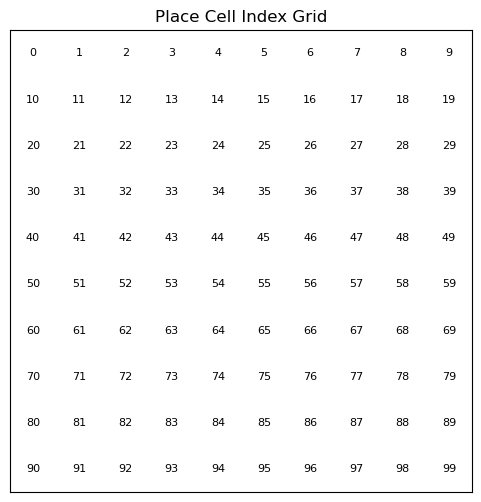

/var/folders/5n/kdl3dytn7171_kqch0_4jk2c0000gn/T/ipykernel_48827/648124914.py:58: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


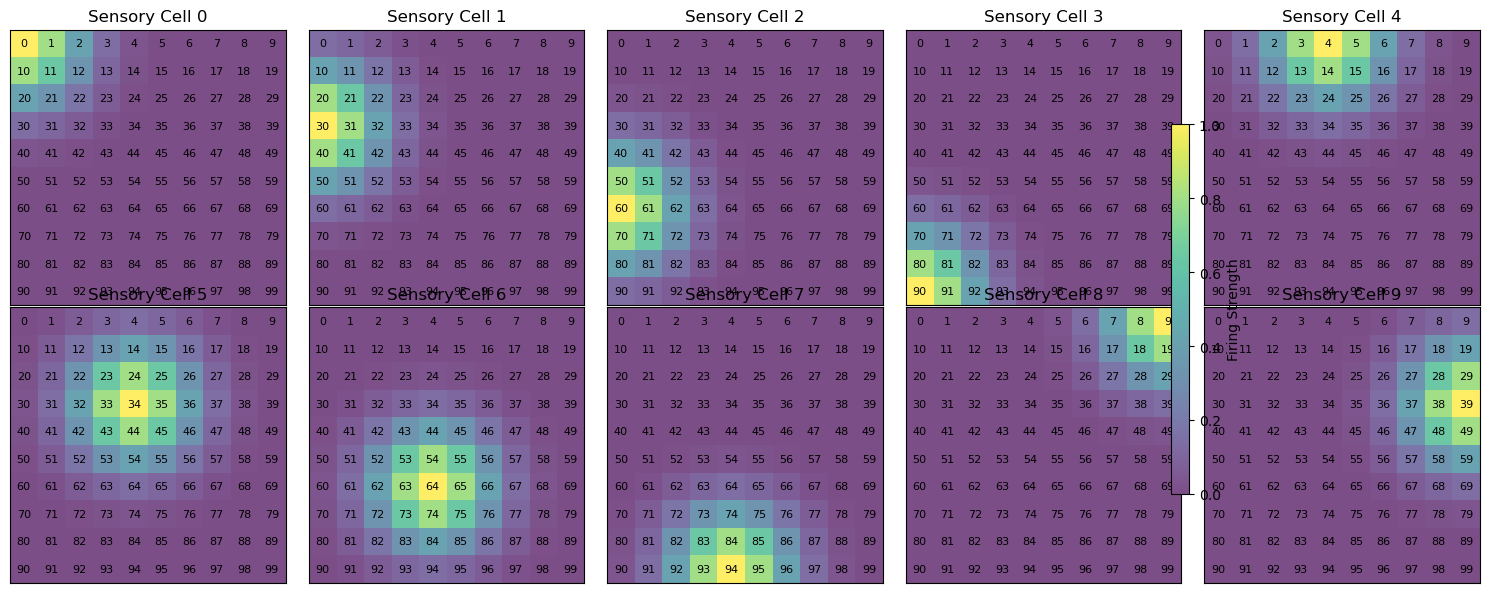

In [76]:
#Step 3: Create a sheet of sensory cells with Gaussian firing fields
nSensoryCells = 10
SensoryFiringFields = np.zeros((rows,cols,nSensoryCells)) # Create an empty matrix, one sheet for each cell, environment the same size as the attractor

# Choose 10 approximately equally spaced row and column indices
nCentre_rows = int(np.sqrt(nSensoryCells))
nCentre_cols = int(np.ceil(nSensoryCells / nCentre_rows))
row_indices = np.linspace(0, rows - 1, nCentre_rows, dtype=int)  # 5 rows
col_indices = np.linspace(0, cols - 1, nCentre_cols, dtype=int)  # 2 columns

# Create all combinations of row and column indices
centers = [(r, c) for r in row_indices for c in col_indices][:nSensoryCells]


# Create grid (X, Y) for the environment
X, Y = np.meshgrid(np.arange(rows), np.arange(cols))

# Compute Gaussian firing fields for each sensory cell center
for i, (cx, cy) in enumerate(centers):
    SensoryFiringFields[:,:,i] = gaussian(X, Y, cx, cy)

# Create a white background figure
plt.figure(figsize=(6, 6))
plt.imshow(np.ones_like(PC_idx), origin='upper', cmap='gray', alpha=0)  # White background

# Overlay the place cell indices as text
for r in range(PC_idx.shape[0]):
    for c in range(PC_idx.shape[1]):
        plt.text(c, r, f"{PC_idx[r, c]}", ha='center', va='center', color='black', fontsize=8)

# Remove ticks and labels for a cleaner look
plt.xticks([])
plt.yticks([])
plt.title("Place Cell Index Grid")

plt.show()

# Create figure with subplots for all sensory cells
fig, axes = plt.subplots(2, 5, figsize=(15, 6))  # 2 rows, 5 columns
axes = axes.flatten()  # Flatten axes for easy iteration

for i, ax in enumerate(axes):
    # Plot the sensory firing field for sensory cell i
    im = ax.imshow(SensoryFiringFields[:, :, i], origin='upper', cmap='viridis', alpha=0.7)

    # Overlay the place cell indices
    for r in range(PC_idx.shape[0]):
        for c in range(PC_idx.shape[1]):
            ax.text(c, r, f"{PC_idx[r, c]}", ha='center', va='center', color='black', fontsize=8)

    ax.set_title(f'Sensory Cell {i}')
    ax.set_xticks([])
    ax.set_yticks([])

# Add colorbar for reference
fig.colorbar(im, ax=axes.ravel().tolist(), shrink=0.8, label="Firing Strength")

plt.tight_layout()
plt.show()
    


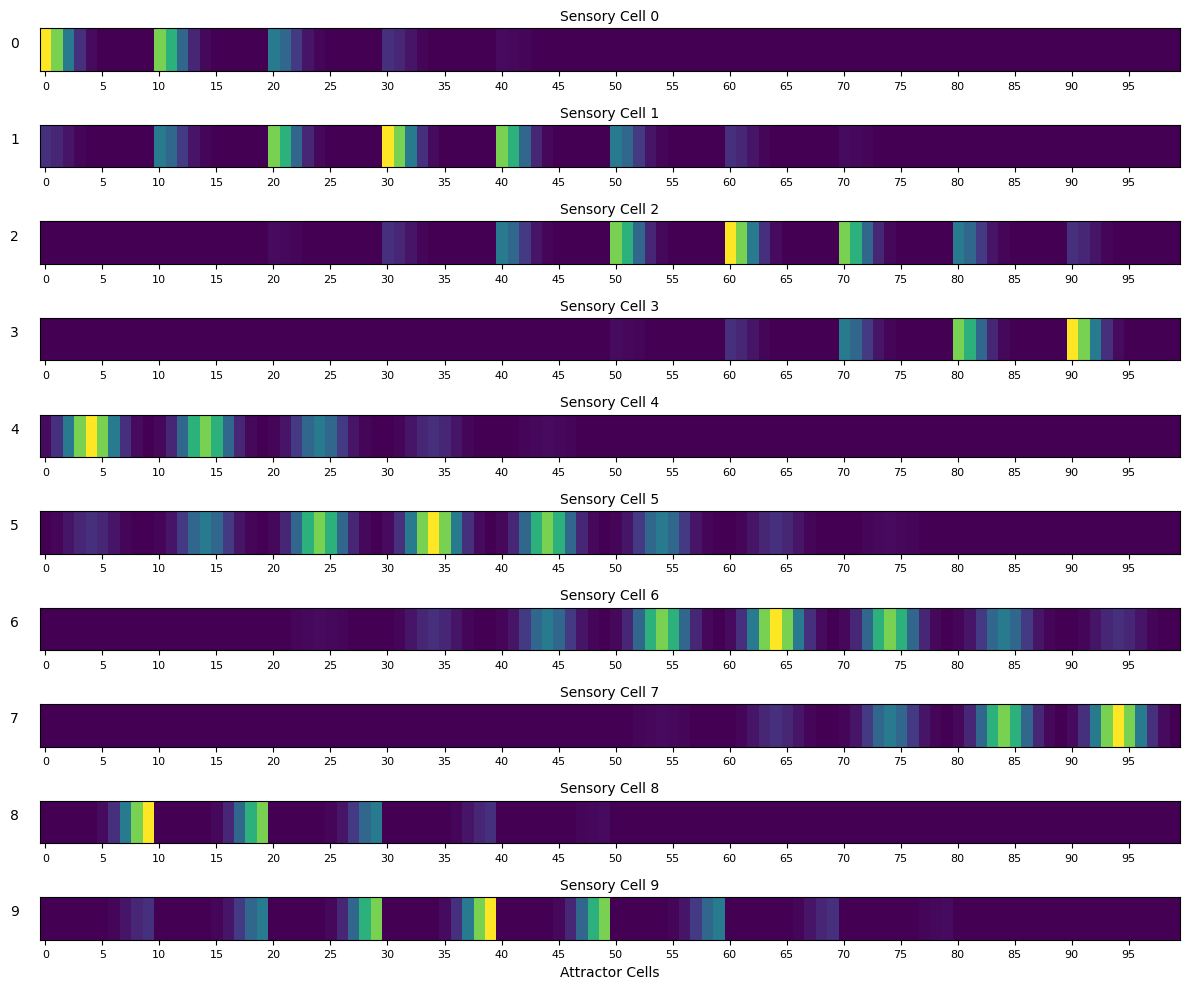

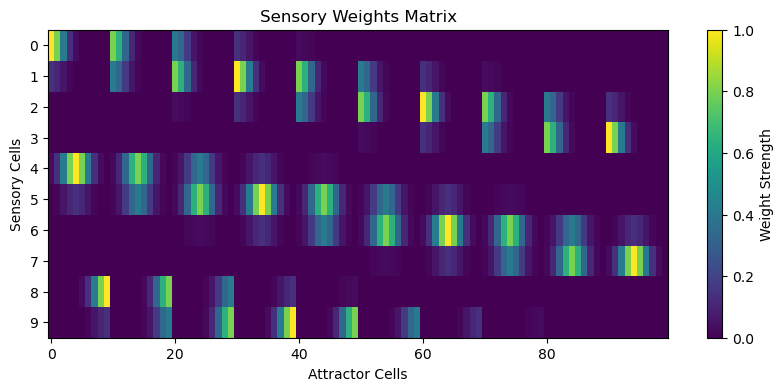

[0.14 0.11 0.06 0.02 0.   0.   0.   0.   0.   0.   0.41 0.33 0.17 0.06
 0.01 0.   0.   0.   0.   0.   0.8  0.64 0.33 0.11 0.02 0.   0.   0.
 0.   0.   1.   0.8  0.41 0.14 0.03 0.   0.   0.   0.   0.   0.8  0.64
 0.33 0.11 0.02 0.   0.   0.   0.   0.   0.41 0.33 0.17 0.06 0.01 0.
 0.   0.   0.   0.   0.14 0.11 0.06 0.02 0.   0.   0.   0.   0.   0.
 0.03 0.02 0.01 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.  ]


In [75]:
# STEP 4: Create a weights matrix between the sensory cells and attractor cells
sensoryWeights = np.zeros((nSensoryCells, nCells))

# Iterate over each place cell
for cell in range(nCells):
    r, c = np.where(PC_idx == cell) # find the position of the cell in the PC sheet

    # Extract firing rates from all sensory cells at this location
    sensoryWeights[:, cell] = SensoryFiringFields[r, c,:]

    # Extract firing rates from all sensory cells at this location
    sensoryWeights[:, cell] = SensoryFiringFields[r, c, :]


# Create a figure with 10 subplots (1 for each sensory cell)
fig, axes = plt.subplots(10, 1, figsize=(12, 10), sharex=True)  # 10 rows, 1 column

for i, ax in enumerate(axes):
    ax.imshow(sensoryWeights[i, :].reshape(1, -1), aspect='auto', cmap='viridis')
    ax.set_title(f'Sensory Cell {i}', fontsize=10)
    ax.set_yticks([])  # Remove y-axis ticks for cleaner look
    ax.set_ylabel(f'{i}', rotation=0, labelpad=15, fontsize=10, ha='right')

    # Ensure x-axis labels on every subplot
    ax.set_xticks(np.arange(0, 100, 5))  # Set ticks every 5 units
    ax.set_xticklabels(np.arange(0, 100, 5), fontsize=8)  # Force labels on all subplots
    ax.tick_params(axis='x', which='both', labelbottom=True)  # Ensure labels are visible

# Set common x-axis label
axes[-1].set_xlabel("Attractor Cells")

# Adjust layout
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 4))  # Adjust width and height to fit the matrix
plt.imshow(sensoryWeights, aspect='auto', cmap='viridis')

# Set y-axis ticks to show all sensory cell indices (0-9)
plt.yticks(np.arange(10), labels=np.arange(10))

plt.colorbar(label="Weight Strength")
plt.xlabel("Attractor Cells")
plt.ylabel("Sensory Cells")
plt.title("Sensory Weights Matrix")

plt.show()

# Print the rounded weights of Sensory Cell 1
print(np.round(sensoryWeights[1, :], 2))

In [ ]:
# Step 5: Create a Trajectory
# for now we are just going to select a position, later we will create a trajectory with a new position at each timestep

position = 12
pcRow, pcCol = np.where(PC_idx == position) # Find the row and column of the place cell
pcRow, pcCol = pcRow[0], pcCol[0]  # Extract integer values


# Find the sensory activity at that position
currentSensoryActivity = SensoryFiringFields[pcRow,pcCol,:] # Extract the sensory activity at that position

currentSensoryActivity = np.transpose([currentSensoryActivity]) # Transpose to make it a column vector for ease of multiplication
# print(currentSensoryActivity) 

currentSensoryActivity = np.matlib.repmat(currentSensoryActivity,1,nCells) #replicate for ease of multiplication with weights
# Duplicates the sensory activity across nCells columns.
# so turned the column vector into a matrix with the same number of columns as the number of cells in the attractor??
print(currentSensoryActivity.shape)


sensoryInput = currentSensoryActivity*sensoryWeights # elementwise multiplication of sensory activity and weights
sensoryInput = np.sum(sensoryInput, axis=0) # sum the columns to give a single sensory value per place cell
sensoryInput = sensoryInput*3 # multiply by a scaling factor
# print(sensoryInput)
print(sensoryInput.shape)

plt.imshow(sensoryWeights)
print(sensoryWeights.shape)


In [ ]:
# Step 3: Set initial firing rate in the enviornment
NetAct = np.random.uniform(low=0, high=1, size=(rows, cols))  # Add noise

# Alternativly set initial activation to a specific value
#NetAct= (np.ones((rows, cols)))/2; #Set inital activity to 0.5


In [ ]:
# Step 4: Calculate the firing of each cell
for _ in range(nIterations):
    NetInput = np.zeros((rows,cols)) # create a temporary store of cell activity so they don't interact
    for k in range(nCells):
        row,col = np.where(PC_idx == k) # find row and column index of cell

        SensoryAct = sensoryInput[k] #Get the sensory inputs to that PC
      #  print('Sensory Input to cell',k, '=', SensoryAct)
       
        
        #if _ == 0:
        NetInput = NetInput+weightsMat[:,:,k]*NetAct[row,col] + SensoryAct # New activity = old activity * weights (summed across cells) + sensory Input
      #  else:
        #NetInput = NetInput+weightsMat[:,:,k]*NetAct[row,col] # New activity = old activity * weights (summed across cells) + sensory Input

   
    NetInput = NetInput / np.max(NetInput)  # Normalise to values between 0 & 1
    
                   # Clear the figure for the next iteration


    NetInput = NetInput * (NetInput >= NetThreshold)  # Threshold
    NetAct = NetInput.copy()  # Set Input to each cell as the new firing rate
    
    create3Dplot(rows,cols,NetAct) # plot - you need to press Enter to progress on to next iteration
       

In [ ]:
# Find the index of the maximum value
max_index = np.unravel_index(np.argmax(NetAct), NetAct.shape)


print("Position of maximum value:", max_index)

In [ ]:
# STEP 7: Compute Sensory Cell Activity Across the Entire Environment

def compute_sensory_activity(SensoryFiringFields, rows, cols, nSensoryCells):
    """
    Computes a 3D matrix (10x10x10) where each (row, col) stores 
    the firing rates of the 10 sensory cells when the mouse is at that position.

    Args:
        SensoryFiringFields (numpy.ndarray): 3D array (rows x cols x nSensoryCells) representing 
                                             the firing fields of each sensory cell.
        rows (int): Number of rows in the environment.
        cols (int): Number of columns in the environment.
        nSensoryCells (int): Number of sensory cells.

    Returns:
        numpy.ndarray: 3D matrix (rows, cols, nSensoryCells) storing 
                      sensory cell activity for each mouse position.
    """
    # Initialize a 3D matrix to store sensory cell activity for every environment position
    sc_activity = np.zeros((rows, cols, nSensoryCells))

    # Iterate over every environment position (mouse position)
    for row in range(rows):
        for col in range(cols):
            # Get the firing of all sensory cells at this position
            sc_activity[row, col, :] = SensoryFiringFields[row, col, :]

    return sc_activity

# Generate the sensory activity matrix
sc_activity = compute_sensory_activity(SensoryFiringFields, rows, cols, nSensoryCells)

# Print shape to confirm it's (10, 10, 10)
print("Sensory Activity Matrix Shape:", sc_activity.shape)

In [ ]:
# STEP 9: Extract Sensory Weights at the Same Position as sc_activity

def extract_sensory_weights(sensoryWeights, PC_idx, pos):
    """
    Extracts the sensory-to-place cell weights for a given (row, col) position.

    Args:
        sensoryWeights (numpy.ndarray): Weight matrix of shape (nSensoryCells, nCells).
        PC_idx (numpy.ndarray): Place cell index map of shape (rows, cols).
        pos (tuple): (row, col) position in the environment.

    Returns:
        numpy.ndarray: Vector of shape (nSensoryCells,) representing the weights at this position.
    """
    row, col = pos
    place_cell_index = PC_idx[row, col]  # Get the corresponding place cell index
    return sensoryWeights[:, place_cell_index]  # Extract weights for all 10 sensory cells

# Select the same random position used for sc_activity
random_position = (np.random.randint(0, rows), np.random.randint(0, cols))

# Extract firing rates of sensory cells at this position
sensory_firing_at_position = sc_activity[random_position[0], random_position[1], :]

# Extract sensory-to-place cell weights at this position
sensory_weights_at_position = extract_sensory_weights(sensoryWeights, PC_idx, random_position)

# Print the results
print(f"Position: {random_position}")
print(f"Sensory Cell Firing Rates at Position {random_position}: {sensory_firing_at_position}")
print(f"Sensory Weights at Position {random_position}: {sensory_weights_at_position}")
activity = sensory_firing_at_position * sensory_weights_at_position
print(activity.shape)


In [ ]:
# Compute the activity across the whole 20x20 environment using dot product
activity_map = np.zeros((rows, cols))

for row in range(rows):
    for col in range(cols):
        # Get sensory cell firing at this position
        sensory_firing_at_position = sc_activity[row, col, :]

        # Get sensory-to-place cell weights at this position
        sensory_weights_at_position = extract_sensory_weights(sensoryWeights, PC_idx, (row, col))

        # Compute activity using dot product
        activity_map[row, col] = np.dot(sensory_firing_at_position, sensory_weights_at_position)

# Print shape to confirm it’s now (20, 20)
print("Activity Map Shape:", activity_map.shape)
plt.imshow(activity_map)

# Plot using create3Dplot
create3Dplot(rows, cols, activity_map)